<a href="https://colab.research.google.com/github/matheusfsm/datascience_steps/blob/master/Wine_type_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Model - (First Steps) - Wine Type**

![texto alternativo](https://cdn.pixabay.com/photo/2016/10/22/20/34/wine-1761613_960_720.jpg)

* This exploratory analysis has as objective the classification wine types, in the case, we have 2 wine types ( Red or White), and we need to make a prediction utilizing a machine learning model.


* The dataset utilized on this exploratory analysis,
can be found through this [link](https://www.kaggle.com/dell4010/wine-dataset?select=wine_dataset.csv).

In [ ]:
# importing libraries
import pandas as pd

In [ ]:
# creating a new df
df = pd.read_csv('/content/drive/My Drive/datasets_16721_22034_wine_dataset.csv')

In [ ]:
# printing the first 5 rows the data
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
# replacing the variable 'style' with binary values, 0 for Red, and 1 for White.
df['style'] = df['style'].replace('red', 0)
df['style'] = df['style'].replace('white', 1)

In [ ]:
# dropping column 'style' the vairable x for before splitting them
y = df['style']
x = df.drop('style', axis=1)

In [ ]:
# printing the correlations matrix
corr = df.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


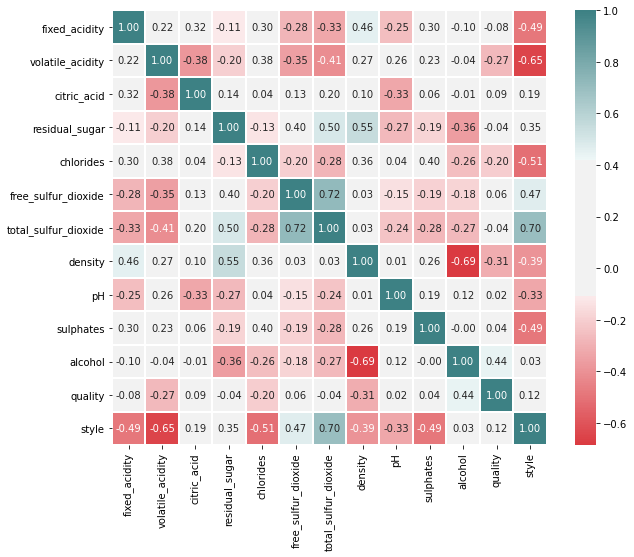

In [ ]:
# Generate a custom diverging colormap
#sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.dark_palette("purple", as_cmap=True)
#cmap = sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sns.diverging_palette(11, 197, sep=80, n=7, as_cmap=True)

# Printing Correlation Matriz with Seaborn
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap=cmap, fmt= '.2f', square=True, linewidths=1, linecolor='white', ax=ax, annot=True );

In [ ]:
# importing machine learning librarie

from sklearn.model_selection import train_test_split

In [ ]:
# splitting the data into 2 variables, predictor and target being y and x
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
x_test.shape

(1950, 12)

In [ ]:
# importing the algorithm
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# creating a model for fit
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

# Accuracy
acc = model.score(x_test, y_test)

print('The accuracy of the model is: {:.4f}'.format(acc))


The accuracy of the model is: 0.9954


In [ ]:
# importing visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# printing y_test
y_test[405:408]

4031    1
1322    0
1535    0
Name: style, dtype: int64

In [ ]:
# printing x_test
x_test[405:408]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4031,6.4,0.27,0.17,8.4,0.044,60.0,198.0,0.99578,3.21,0.47,9.4,5
1322,9.1,0.34,0.42,1.8,0.058,9.0,18.0,0.99392,3.18,0.55,11.4,5
1535,7.0,0.55,0.13,2.2,0.075,15.0,35.0,0.99590,3.36,0.59,9.7,6


In [ ]:
# making predictions
predictions = model.predict(x_test[405:408])

In [ ]:
#printing predictions
predictions

array([1, 0, 0])